In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r_2
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
mpl.rcParams.update({'font.size': 18})
%matplotlib inline

In [2]:
df_train = pd.read_pickle('df_train.pkl')
df_test = pd.read_pickle('df_test.pkl')

TARGET_COLUMN = 'Price'
CATEGORY_COLUMNS = ['DistrictId', 'Rooms', 'Ecology_1', 'Ecology_2', 'Shops_1', 'Helthcare_2', 'Rooms_outlier', 'HouseFloor_outlier',
                   'District_big', 'Floor_category', 'Year_category', 'Healthcare_1_outlier', 'DistrictSize', 'PriceMedian_year', 'PriceMedian_district']
NUMBER_COLUMNS = df_train.columns.drop(CATEGORY_COLUMNS).tolist()
NUMBER_COLUMNS.remove(TARGET_COLUMN)
NUMBER_COLUMNS.remove('Id')

## 3 train test split

In [13]:
# df_train.drop(columns='Id', inplace=True)

def split_data(df, share_of_dough):
    x = df.drop(TARGET_COLUMN, axis=1)
    y = df[TARGET_COLUMN]
    return train_test_split(x, y, test_size=share_of_dough, random_state=49)

x_train, x_valid, y_train, y_valid = split_data(df_train, .25)


In [14]:
model_scaler = StandardScaler()
x_train[NUMBER_COLUMNS] = model_scaler.fit_transform(x_train[NUMBER_COLUMNS])
x_valid[NUMBER_COLUMNS] = model_scaler.transform(x_valid[NUMBER_COLUMNS])

## model learn

In [17]:
model_regression = BaggingRegressor(n_estimators=180, max_features=15, max_samples=720, oob_score='r2', random_state=49)
model_regression.fit(x_train, y_train)
pred_train = model_regression.predict(x_train)
pred_valid = model_regression.predict(x_valid)
print(r_2(y_train, pred_train), 'TRAIN', sep='\t')
print(r_2(y_valid, pred_valid), 'VALID', sep='\t')


0.7808267433744104	TRAIN
0.7296320321953952	VALID


0.7235296964011382 R2 valid 
 0.7687408542246768 R2 train 	 value 14 

0.726558660452203 R2 valid 
 0.7718830181384273 R2 train 	 value 16 

0.7264842313402062 R2 valid 
 0.7735297458520134 R2 train 	 value 18 

0.7270935520697661 R2 valid 
 0.7762353697980245 R2 train 	 value 20 

0.7280351843656541 R2 valid 
 0.7775484526220562 R2 train 	 value 22 

0.7244005248580108 R2 valid 
 0.7768195784401597 R2 train 	 value 24 



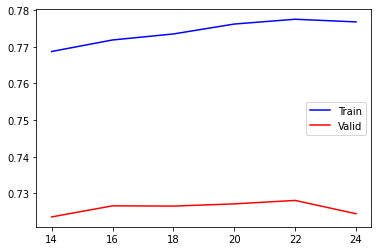

In [31]:
param_range = np.arange(14, 26, 2)

def model_bagging(x_train, x_valid, y_train, y_valid):
    r2_train_list = list()
    r2_valid_list = list()
    for val in param_range:
        model_regressor = BaggingRegressor(n_estimators=180, max_features=val, max_samples=610, random_state=49)
        model_regressor.fit(x_train, y_train)
        y_pred_valid = model_regressor.predict(x_valid)
        y_pred_train = model_regressor.predict(x_train)
        r2_valid = r_2(y_valid, y_pred_valid)
        r2_train = r_2(y_train, y_pred_train)
        r2_train_list.append(r2_train)
        r2_valid_list.append(r2_valid)
        print(r2_valid, 'R2 valid', '\n',
              r2_train, 'R2 train', '\t',  f'value {val}', '\n')
    return r2_train_list, r2_valid_list

r2_train, r2_valid = model_bagging(x_train, x_valid, y_train, y_valid)

value = list(param_range)
plt.plot(value, r2_train, color='b', label='Train')
plt.plot(value, r2_valid, color='r', label='Valid')
plt.legend()

# The best parameters
# max_samples = 610
# n_estimators = 180
# max_features = 22

In [32]:
model_bagging_result = BaggingRegressor(n_estimators=180, max_samples=610, max_features=22, random_state=49)
model_bagging_result.fit(x_train, y_train)
pred_train = model_bagging_result.predict(x_train)
pred_valid = model_bagging_result.predict(x_valid)

print(r_2(y_train, pred_train), 'R2 train', '\n',
        r_2(y_valid, pred_valid), 'R2 valid')

# 0.7775484526220562 R2 train
#  0.7280351843656541 R2 valid

0.7775484526220562 R2 train 
 0.7280351843656541 R2 valid


0.7532480539404904 R2 valid 
 0.8204692941653043 R2 train 	 value 16 

0.7529415941396929 R2 valid 
 0.8223990028856466 R2 train 	 value 17 

0.753621112077468 R2 valid 
 0.8202411034760501 R2 train 	 value 18 

0.7475947338229962 R2 valid 
 0.8193763017930943 R2 train 	 value 19 

0.747302651236319 R2 valid 
 0.8181324770283382 R2 train 	 value 20 

0.7508351708896295 R2 valid 
 0.8220188201256139 R2 train 	 value 21 



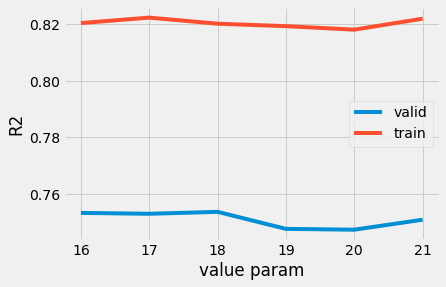

In [40]:
param_range = np.arange(16, 22, 1)

def model_gradient(x_train, x_valid, y_train, y_valid):
    r2_train_list = list()
    r2_valid_list = list()
    for val in param_range:
        model_regressor = GradientBoostingRegressor(n_estimators=80, max_depth=4, max_features=val, random_state=49)
        model_regressor.fit(x_train, y_train)
        y_pred_valid = model_regressor.predict(x_valid)
        y_pred_train = model_regressor.predict(x_train)
        r2_valid = r_2(y_valid, y_pred_valid)
        r2_train = r_2(y_train, y_pred_train)
        r2_train_list.append(r2_train)
        r2_valid_list.append(r2_valid)
        print(r2_valid, 'R2 valid', '\n',
              r2_train, 'R2 train', '\t',  f'value {val}', '\n')
    return r2_train_list, r2_valid_list

r2_train, r2_valid = model_gradient(x_train, x_valid, y_train, y_valid)

value = list(param_range)
plt.style.use('fivethirtyeight')
plt.plot(value, r2_valid, label='valid')
plt.plot(value, r2_train, label='train')
plt.xlabel('value param')
plt.ylabel('R2')
plt.legend()

# The best parameters
# n_estimators = 80
# max_depth = 4
# max_features = 18

In [47]:
model_gradient_result = GradientBoostingRegressor(n_estimators=80, max_depth=4, max_features=18, random_state=49)
model_gradient_result.fit(x_train, y_train)
pred_train = model_gradient_result.predict(x_train)
pred_valid = model_bagging_result.predict(x_valid)
print(r_2(y_train, pred_train), 'TRAIN', sep='\t')
print(r_2(y_valid, pred_valid), 'VALID', sep='\t')

# 0.8202411034760501	TRAIN
# 0.7280351843656541	VALID

0.8202411034760501	TRAIN
0.7280351843656541	VALID


## I chose BaggingRegressor model because this model is less retrained

In [50]:
id_test = df_test['Id']
df_test.drop('Id', axis=1, inplace=True)

def get_result(x_train, x_valid, y_train, y_valid, x_test):
    model_regression = BaggingRegressor(n_estimators=180, max_samples=610, max_features=22, random_state=49)
    model_regression.fit(x_train, y_train)
    y_pred_test = model_regression.predict(x_test)
    y_pred_valid = model_regression.predict(x_valid)
    y_pred_train = model_regression.predict(x_train)
    r2_valid = r_2(y_valid, y_pred_valid)
    r2_train = r_2(y_train, y_pred_train)
    print(r2_valid, 'R2 valid', '\n',
              r2_train, 'R2 train', '\t')
    return y_pred_test, model_regression

y_pred_result, final_model = get_result(x_train, x_valid, y_train, y_valid, df_test)

0.7280351843656541 R2 valid 
 0.7775484526220562 R2 train 	


In [52]:
result_df = pd.DataFrame({'Id': id_test, 'Price': y_pred_result}, columns=['Id', 'Price'])
result_df

,Id,Price
0,4567,280513.146918
1,5925,225186.014236
2,960,254646.095443
3,3848,246551.025738
4,746,269491.821007
...,...,...
4995,10379,314216.687847
4996,16138,419612.126432
4997,3912,253945.805208
4998,5722,287105.227344


In [55]:
result_df.to_csv('Simakov_Ya_bagging_predict.csv', index=False)
